In [201]:
import numpy as np
import pandas as pd
df = pd.read_csv('/Users/josephhartono/Documents/GitHub/NBA-Draft-Biola-Summer-Research/salaries_w_bins_1984_to_2021.csv')
df['salary'] = df['salary'].astype(int)


In [202]:
#seperate those with multiple positions
pg = df.loc[df['position'].str.contains("Point", case=False)]
sg = df.loc[df['position'].str.contains("Shooting", case=False)]
sf = df.loc[df['position'].str.contains("Small", case=False)]
pf = df.loc[df['position'].str.contains("Power", case=False)]
c = df.loc[df['position'].str.contains("Center", case=False)]

In [203]:
#function that gets max for each year and appends the normalized salary to a series

#for year in years
    #create a new series
    #find the max of that year
    #append normalized salary
#append series to dataframe
def normalized_salaries(dataframe):
    salaries = []
    
    for year in set(dataframe['season_start']):
        
        salary_df = dataframe[dataframe['season_start'] == year]
        
        max_sal = 0
        
        for sal in salary_df['salary']:
            if sal > max_sal:
                max_sal = sal

        for sal in salary_df['salary']:
            salaries.append(int(sal)/max_sal)
        
    return salaries

In [204]:
#place to run code

pg['normalized'] = normalized_salaries(pg)
sg['normalized'] = normalized_salaries(sg)
sf['normalized'] = normalized_salaries(sf)
pf['normalized'] = normalized_salaries(pf)
c['normalized'] = normalized_salaries(c)
# display(pg)
# display(sg)
# display(pf)
# display(sf)
# display(c)

pg = pg.assign(position='Point Guard')
sg = sg.assign(position='Shooting Guard')
sf = sf.assign(position='Small Forward')
pf = pf.assign(position='Power Forward')
c = c.assign(position='Center')

frames = [pg, sg, sf, pf, c]
result = pd.concat(frames)

display(result)

/Users/josephhartono/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/josephhartono/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/josephhartono/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/ipykernel_launc

,name,salary,season_start,season_end,salary_bin,position,normalized
3,Danny Ainge,400000,1984,1985,minimum,Point Guard,0.160000
4,John Bagley,209000,1984,1985,minimum,Point Guard,0.083600
18,Quinn Buckner,239000,1984,1985,minimum,Point Guard,0.095600
19,Don Buse,130000,1984,1985,minimum,Point Guard,0.052000
27,Maurice Cheeks,350000,1984,1985,minimum,Point Guard,0.140000
...,...,...,...,...,...,...,...
15918,Jon Teske,53176,2021,2022,minimum,Center,0.001504
15919,Aric Holman,53176,2021,2022,minimum,Center,0.001504
15920,Javin DeLaurier,53176,2021,2022,minimum,Center,0.001504
15928,Jaime Echenique,53176,2021,2022,minimum,Center,0.001504


<Figure size 3000x1000 with 0 Axes>

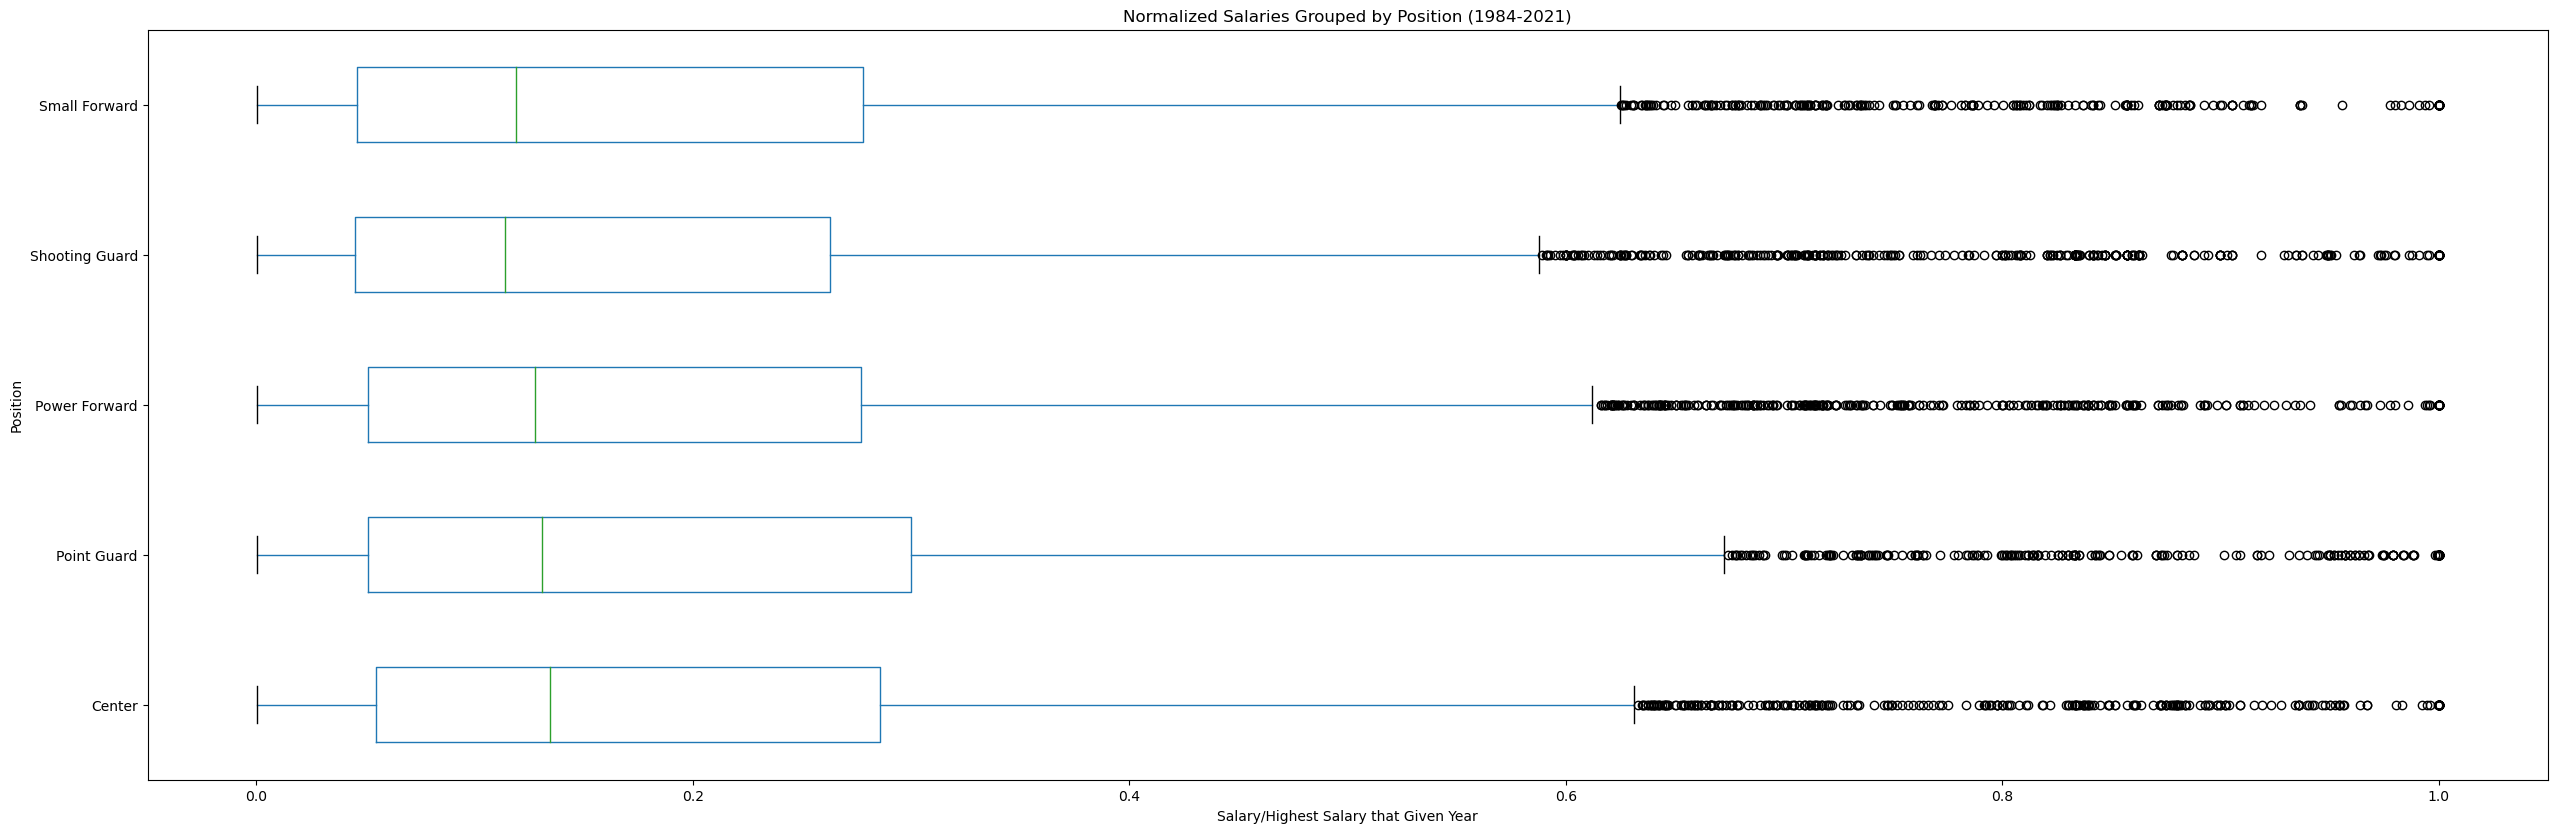

In [210]:
plt.clf()


result = result[['position','normalized']]
boxplot = result.boxplot(by=['position'], vert = False, grid=False, positions = [1,2,3,4,5]) #C = 1
#2,5,4,3,1
#pg
#pf
#sg
#c
#sf

#1,2,3,4,5
#sf


fig = boxplot.get_figure()

fig.suptitle('')

plt.title("Normalized Salaries Grouped by Position (1984-2021)")
plt.ylabel("Position")
plt.xlabel("Salary/Highest Salary that Given Year")
plt.rcParams['figure.figsize'] = [30, 20]
plt.show()